In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/frames.zip','r') as f:
  f.extractall()

In [ ]:
import glob
images=glob.glob('/content/frames/*')

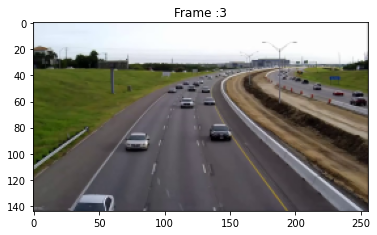

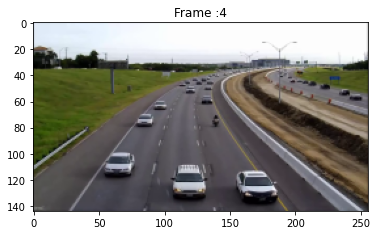

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
i=3
for img in [i,i+1]:
  img_cv=cv2.imread(images[img])
  img_RGB=cv2.cvtColor(img_cv,cv2.COLOR_BGR2RGB)
  plt.title('Frame :'+ str(img))
  plt.imshow(img_RGB)
  plt.show()

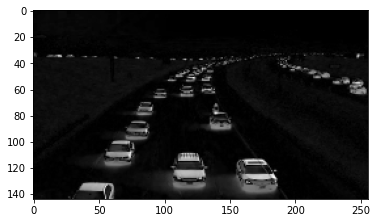

In [ ]:
#define difference between two images
img_A=cv2.imread(images[i])
img_B=cv2.imread(images[i+1])
gray_A=cv2.cvtColor(img_A,cv2.COLOR_RGB2GRAY)
gray_B=cv2.cvtColor(img_B,cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.absdiff(gray_B,gray_A),cmap='gray')

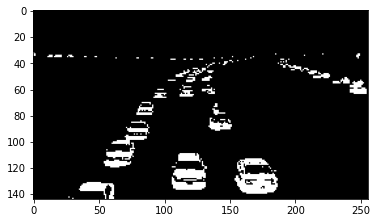

In [ ]:
#threshold Image
img_diff=cv2.absdiff(gray_B,gray_A)
ret,thresh=cv2.threshold(img_diff,40,255,cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')

In [ ]:
# we can see most of the noise are gone however highlighted regions are fragmented, so for that we go for dilation

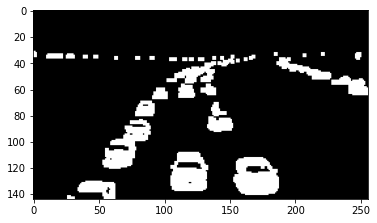

In [ ]:
import numpy as np
kernel=np.ones((3,3),np.uint8)
dilated=cv2.dilate(thresh,kernel,iterations=1)
plt.imshow(dilated,cmap='gray')

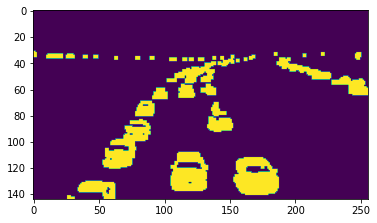

In [ ]:
# lets decide zone where you want to recognize objects
plt.imshow(dilated)
cv2.line(dilated,(0,80),(256,80),(255,0,0))
plt.show()


In [ ]:
# now lets find the contours on detection zone that we have created
contours,hierarchy=cv2.findContours(thresh.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)


In [ ]:
valid_cntrs=[]
# cv2.contourArea(contours[10])
for i,cntr in enumerate(contours):
  x,y,w,h=cv2.boundingRect(cntr)
  if (x<=200) & (y>=80) & (cv2.contourArea(cntr)>=25):
    valid_cntrs.append(cntr)


In [ ]:
len(valid_cntrs)

4

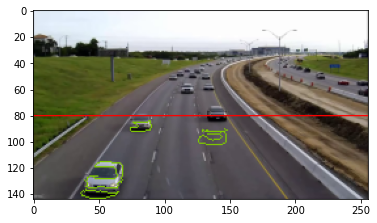

In [ ]:
#lets draw contours
img=images[4]
img=cv2.imread(img)
img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
cv2.drawContours(img,valid_cntrs,-1, (127,200,0), 1)
cv2.line(img, (0, 80),(256,80),(255,0,0))
plt.imshow(img)
plt.show()

Apply frame differencing on every pair of consecutive frames.

Apply image thresholding on the output image of the previous step.

Perform image dilation on the output image of the previous step.

Find contours in the output image of the previous step.

Shortlist contours appearing in the detection zone.

Save frames along with the final contours.

In [ ]:
# kernel for image dilation
kernel = np.ones((4,4),np.uint8)

# font style
font = cv2.FONT_HERSHEY_SIMPLEX

# directory to save the ouput frames
path = "/content/drive/My Drive/contour_frames/"

for i in range(len(images)-1):
  #frame differencing 
  img_A=cv2.imread(images[i])
  img_B=cv2.imread(images[i+1])
  gray_A=cv2.cvtColor(img_A,cv2.COLOR_BGR2GRAY)
  gray_B=cv2.cvtColor(img_B,cv2.COLOR_BGR2GRAY)
  diff_image=cv2.absdiff(gray_B,gray_A)

  # thresholding
  ret,thresh=cv2.threshold(diff_image,30,255,cv2.THRESH_BINARY)

  #dilation
  dilated=cv2.dilate(thresh,kernel,iterations=1)

  # find Contours
  valid_cntrs=[]
  contours,hierarchy=cv2.findContours(dilated.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

  for cntr in contours:
    x,y,w,h=cv2.boundingRect(cntr)
    if (x<=200) & (y>=80) & (cv2.contourArea(cntr)>=25):
       if (y >= 90) & (cv2.contourArea(cntr) < 40):

        break

       valid_cntrs.append(cntr)

  dmy=images[i]
  dmy=cv2.imread(dmy)
  cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
    
  cv2.putText(dmy, "vehicles detected: " + str(len(valid_cntrs)), (55, 15), font, 0.6, (0, 180, 0), 2)
  cv2.line(dmy, (0, 80),(256,80),(100, 255, 255))
  cv2.imwrite(path+str(i)+'.png',dmy)
  # plt.imshow(dmy)


  


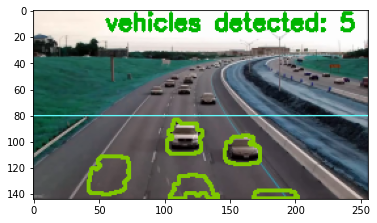

In [ ]:
plt.imshow(cv2.imread('/content/contour_frames93.png'))

In [ ]:
 # specify video name
path_video = 'vehicle_detection.mp4'

# specify frames per second
fps = 14.0

In [ ]:
frame_array=[]
files=glob.glob('/content/drive/My Drive/contour_frames/*')

In [ ]:
files.sort(key=lambda f: int(re.sub('\D', '', f)))
for i in range(len(files)):  
  filename=files[i]

  #read frames
  img = cv2.imread(filename)
  height, width, layers = img.shape
  size = (width,height)

  #inserting the frames into an image array
  frame_array.append(img)

In [ ]:
out=cv2.VideoWriter(path_video,cv2.VideoWriter_fourcc(*'DIVX'),fps,size)
for i in range(len(frame_array)):
  out.write(frame_array[i])
out.release()